# Finding Hidden Messages in DNA
## Week2

**Replication process in more detail:**<br/>
Replication occurs on two complementary DNA strands running in opposite directions, starting at ori. As the strands unwind they create two replication forks, that expand in both directions around the chromosome until complete separation at replication terminus (ter). This process is mediated by DNA polymerase (DNA pol) a unidirectional enzyme that can traverse a template DNA strand in only the 3'-5' direction.<br/><br/>
Knowing this we can think of the replication task occurring on 4 half-strands of DNA (2 reverse and 2 forward half-strand)
* The two forward (lagging) half-strands are traversed from ori to ter in the 5'-3' direction (replication occurs backward toward ori)<br/>DNA pol must wait for the replication fork to open, then a new primer is formed and replication begins back toward ori forming fragments called Okazaki fragments.
* The two reverse (leading) half-strands are traversed from ori to ter in the 3'-5' direction (replication can occur non-stop)

When replication is complete there are still gaps between the fragments that must be sewn together by DNA ligase
![](http://bioinformaticsalgorithms.com/images/Replication/okazaki.png)

Since the reverse (leading) half-strands can be synthesized by a single DNA pol. These strands do not exist in a single stranded state as they are unwound for very long. The forward (lagging) strands however, having to wait for the replication fork to extend and requiring many DNA pol, spends much of its life in a single stranded state. Single stranded DNA is less stable and susceptible to greater mutation rate, specifically cytosine (C) -> Thymine (T) deamination (100 fold increase). <br/><br/>
Can we take advantage of this to locate ori?<br/>
Since the difference between the total amount of guanine (G) and total cytosine (C) is negative on the reverse half-strand and positive on the forward half-strand. We can traverse the genome, keeping a running total of the difference between the G-C by utilizing a skew diagram. As we move through the genome starting from an arbitrary position and a skew of 0 we add 1 for every G and subtract one for every C. Based on the greater stability of double stranded DNA we expect to find a skew minimum at the ori position and a skew maximum near the ter position.

In [1]:
# Genomic Skew Calculation (G_total - C_total)
# Input: String genomic sequence
# Output: Integer array where at any i-th position is the total skew at that poision in the genome

def skew(seq):
    skew = [0]
    for i, base in enumerate(seq):
        if base == 'G':
            skew.append(skew[i] + 1)
        elif base == 'C':
            skew.append(skew[i] - 1)
        else:
            skew.append(skew[i])
    return skew

print(*skew("TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT"))

0 0 0 0 0 1 1 0 0 1 0 -1 0 0 1 1 2 3 2 1 1 1 0 0 -1 0 0 1 1 2 1 1 1 2 2 2 1 2 2 3 4 5 6 5 6 6 6 6 6 5 6 5 6 7 8 8 7 6 7 7 7


In [2]:
# Skew Minimum (identifies candidate ori positions)
# Inputs: String genomic sequence
# Ouput: Integer array containing genomic positons in which the skew is minimized

def skewMin(seq):
    totSkew = skew(seq)
    sMin = min(totSkew)
    allMin = []
    for i, val in enumerate(totSkew):
        if val == sMin:
            allMin.append(i)
    return allMin

#print(skewMin("TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT"))
#with open("./Data/dataset_7_6.txt") as inFile:
with open("../Week1/Data/E_coli.txt") as inFile:
    data = inFile.readlines()

print(*skewMin(data[0].strip()))

3923620 3923621 3923622 3923623


Now we are able to identify likely ori sites and most common k-mers within that region utilizing the skewMin and frequentWords functions. When utilizing these functions on the E.coli genome we identify possible ori region starting at position 3923620 (minSkew). However no common 9-mers or possible DnaA boxes are identified, why is this? It is important to note that DnaA can bind not only to "perfect" DnaA boxes but to slight variations as well.</br>

Finding close matches to the "perfect" k-mer can be done by calculating the Hamming Distance, which is the the number of mismatches between two sequences.

In [1]:
# Hamming Distance Problem (hammDist)
# Input: Two strings of equal length
# Output: Integer distance between the two strings

def hammDist(seq1, seq2, d=-1):
    dist = 0
    if len(seq1) != len(seq2):
        return -1
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            dist += 1
        if d != -1 and dist > d:
            return -1
    return dist

with open("./Data/dataset_9_3.txt") as inFile:
    data = inFile.readlines()
    
hammDist(data[0].strip(), data[1].strip())

747

Now that we can calculate the Hamming Distance, we can implement an approximate pattern matching algorithm that finds a k-mer and all approximate k-mers within d distance (mismatches). 

In [4]:
# Approximate Pattern Matching Problem (approxPM)
# Input: Strings pattern and Text along with integer d
# Output: All starting positions where pattern or an approximate pattern with at most d mismatches appears in text

def approxPM(pattern, text, d):
    res = []
    for i in range(len(text) - len(pattern) + 1):
        kmer = text[i:i+len(pattern)]
        if hammDist(pattern, kmer, d) > -1:
            res.append(i)
    return res

#print(approxPM("ATTCTGGA", "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT", 3))
print(len(approxPM("AAAAA", "AACAAGCTGATAAACATTTAAAGAG", 2)))
# with open("./Data/dataset_9_4.txt") as inFile:
#     data = inFile.readlines()
    
# print(*approxPM(data[0].strip(), data[1].strip(), int(data[2].strip())))

11


Now we would like to modify the previous algorithm for the frequent words problem. Given strings text and pattern as well as integer d, we would like to count the total number of occurrences of pattern in text with at most d mismatches.

In [5]:
# Approximate Pattern Count
# Input: Strings pattern and text as well as integer d
# Output: Count of patterns found within text with no more than d mismatches

def approxPC(pattern, text, d):
    count = 0
    for i in range(len(text) - len(pattern) + 1):
        pat = text[i:i+len(pattern)]
        if hammDist(pattern, pat, d) > -1:
            count += 1
    return count

#print(approxPC("GAGG", "TTTAGAGCCTTCAGAGG", 2))
with open("./Data/dataset_9_6.txt") as inFile:
    data = inFile.readlines()

pat = data[0].strip()
text = data[1].strip()
d = int(data[2].strip())
print(f"Pattern: {pat}\nd: {d}\n{approxPC(pat, text, d)}")

Pattern: TCCAC
d: 3
132


We are now ready to write an algorithm that will find most frequent k-mer with up to d mismatches within a text. Note that pattern does not need to actually appear as a substring of text

In [6]:
# Find d-neighbors of a string
# Input: String pattern and integer d
# Output: String array containng the d-neighbors to pattern

def neighbors(pattern, d):
    nucleos = {'A', 'C', 'G', 'T'}
    if d == 0: # if we want an exact match (d=0, no mismatches allowed) just return the pattern
        return pattern
    if len(pattern) == 1: # if the pattern is just a single nucleotide return the nucleotide set
        return nucleos
    hood = set()
    sufNeighbors = neighbors(pattern[1:], d) # Calculate all neighbors of the pattern suffix
    for neighbor in sufNeighbors:
        if hammDist(pattern[1:], neighbor) < d:
            for nucleotide in nucleos:
                hood.add(nucleotide + neighbor)
        else:
            hood.add(pattern[:1] + neighbor)
    return hood

print(*neighbors("ACG", 1))

# with open("./Data/dataset_3014_4.txt") as inFile:
#     data = inFile.readlines()

# pattern = data[0].strip()
# d = int(data[1].strip())
# print(*neighbors(pattern, d))

ACC AAG ACT TCG ACA ACG ATG CCG GCG AGG


In [7]:
# Helper functions imported from week 1

def symToNum(symbol):
    symMap = {'A': 0,
              'C': 1,
              'G': 2,
              'T': 3}
    return symMap[symbol]

def numToSym(num):
    numMap = {0: 'A',
              1: 'C',
              2: 'G',
              3: 'T'}
    return numMap[num]

def numToPat(index, k):
    if k == 1:
        return numToSym(index)
    pfixIndex = int(index / 4)
    r = index % 4
    sym = numToSym(r)
    pfixPattern = numToPat(pfixIndex, k - 1)
    return pfixPattern + sym

def patToNum(pattern):
    if not pattern:
        return 0
    symbol = pattern[-1]
    prefix = pattern[:-1]
    return 4 * patToNum(prefix) + symToNum(symbol)

def revComp(pattern):
    codon = {'A': 'T',
             'T': 'A',
             'G': 'C',
             'C': 'G'}
    return ''.join(codon[x] for x in pattern[::-1])

In [8]:
# Frequent Words with Mismatches and Reverse Complements
# Input: String text a DNA sequence, integers k and d
# Output: All k-mers that maximize count(text, pattern) and revCompCount(text, pattern)

def compFreqMisRV(text, k ,d, rev=True):
    freqArr = [0] * (4 ** k)
    for i in range(len(text) - k + 1):
        pattern = text[i:i + k]
        hood = neighbors(pattern, d)
        for neighbor in hood:
            j = patToNum(neighbor)
            freqArr[j] += 1
        if rev:    
            rvPat = revComp(pattern)
            rvHood = neighbors(rvPat, d)
            for neighbor in rvHood:
                j = patToNum(neighbor)
                freqArr[j] += 1
    res = []
    mx = max(freqArr)
    for i in range(len(freqArr)):
        if freqArr[i] == mx:
            res.append(numToPat(i, k))
    return res
            
#compFreqMisRV("ACGTTGCATGTCGCATGATGCATGAGAGCT", 4, 1, True)

with open("./Data/dataset_9_8.txt") as inFile:
    data = inFile.readlines()

text = data[0].strip()
nums = data[1].split(' ')

k = int(nums[0].strip())
d = int(nums[1].strip())

print(*compFreqMisRV(text, k, d, True))

CCCCCC GGGGGG


In [13]:
#Quiz

#Q2
print(f"Hamm Distance: {hammDist('CTACAGCAATACGATCATATGCGGATCCGCAGTGGCCGGTAGACACACGT', 'CTACCCCGCTGCTCAATGACCGGGACTAAAGAGGCGAAGATTATGGTGTG')}\n")

#Q3
skw = skew("GATACACTTCCCGAGTAGGTACTG")
print(f"Max Skew Index: {skw.index(max(skw))}\n")

#Q4
print(f"Count: {approxPC('CCC', 'CATGCCATTCGCATTGTCCCAGTGA', 2)}\n")

#Q5
hood = compFreqMisRV("CCAGTCAATG", 10, 1, False)
print(f"5-mer 2-neighbors of TGCAT: {len(hood)}\n")

Hamm Distance: 36

Max Skew Index: 1

Count: 15

5-mer 2-neighbors of TGCAT: 31



Putting it all together</br>

Find DnaA box in Salmonella enterica

In [26]:
with open("./Data/Salmonella_enterica.txt") as inFile:
    data = inFile.readlines()

name = data[0].strip()

seq = ""
for i in range(1, len(data)):
    seq += data[i].strip()
print(f"Sequence Info: {name}\nSequence Length: {len(seq)}\nSequence Begin (pos 0-75): {seq[:75]}")

Sequence Info: >gi|16758993|ref|NC_003198.1| Salmonella enterica subsp. enterica serovar Typhi str. CT18 chromosome, complete genome
Sequence Length: 4809037
Sequence Begin (pos 0-75): AGAGATTACGTCTGGTTGCAAGAGATCATAACAGGGGAAATTGATTGAAAATAAATATATCGCCAGCAGCACATG


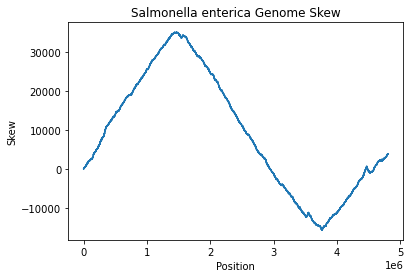

In [33]:
import matplotlib.pyplot as plt

SEskew = skew(seq)

plt.xlabel("Position")
plt.ylabel("Skew")
plt.title("Salmonella enterica Genome Skew")
plt.plot([x for x in range(len(SEskew))], SEskew);

In [34]:
SEskewMin = skewMin(seq)
print(f"Skew Minimum Positions: {SEskewMin}\n")

Skew Minimum Positions: [3764856, 3764858]



In [35]:
window = seq[3764856 - 250 : 3764856 + 250]
res = compFreqMisRV(window, 9, 1)
print(f"{res}\n")

['AGCTTCCGG', 'CCGGAAGCT']

